<p style="font-size:200%; font-weight:bold"> 检查Swap数据 </p>

- Author: Yichen Luo
- Date: 2022/5/14

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('max_colwidth',100)
RD = '/home/yichen/2022_nft/02_rdata/'
WD = '/home/yichen/2022_nft/03_wdata/'

# Uniswap V3

## 数据读取

In [2]:
df = pd.read_csv(f'{WD}uniswapv3_ethereum.csv')
df.shape
df.sample(3)

(14199536, 16)

,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id
5087725,0xfae7cc0fed2de3cafb1811c002434f068d0cc2a5ed4bcceb6031cdecfd23ecf3#1402,17111.111100,-2597.319088,2598.516565,51,0x35a79017da727fcb29060dd5901f90b027eaca23,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xdef1c0ded9bec7f1a1670819833240f027b25eff,30745624684289211459821,-295257,2021-12-12 11:18:21,Swash Token,Tether USD,0xa130e3a33a4d84b04c3918c4e5762223ae252f80,0xdac17f958d2ee523a2206206994597c13d831ec7,0xfae7cc0fed2de3cafb1811c002434f068d0cc2a5ed4bcceb6031cdecfd23ecf3
13692551,0xe1e7dccafce54517d08066f682baddc15985474a538cdc3ac288b35206d68a8e#9185,26802.507273,-1.000000,3964.452224,243,0x93282d0310e7255b5d23d82385659edcdf9438da,0xe592427a0aece92de3edee1f18e0157c05861564,0xe592427a0aece92de3edee1f18e0157c05861564,48555332130281948039236934453312,128368,2021-12-21 03:47:46,CircuitsOfValue,Wrapped Ether,0x3d658390460295fb963f54dc0899cfb1c30776df,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe1e7dccafce54517d08066f682baddc15985474a538cdc3ac288b35206d68a8e
11535346,0x9c7a38905dfbe1aacacc5702141d374d3d30f384c9a8399be5045d7c2a155942#1077,-21411.454687,20.000000,71320.041563,6,0xb8a9f91b4730ca612e1a38602100c39eb425c062,0xb8a9f91b4730ca612e1a38602100c39eb425c062,0xe592427a0aece92de3edee1f18e0157c05861564,2433411932013608955447927560,-69665,2021-10-07 15:19:01,Ribbon,Wrapped Ether,0x6123b0049f904d730db3c36a31167d9d4121fa6b,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x9c7a38905dfbe1aacacc5702141d374d3d30f384c9a8399be5045d7c2a155942


In [12]:
df.keys()

Index(['id', 'amount0', 'amount1', 'amountUSD', 'logIndex', 'origin',
       'recipient', 'sender', 'sqrtPriceX96', 'tick', 'timestamp',
       'token0_name', 'token1_name', 'token0_id', 'token1_id',
       'transaction_id'],
      dtype='object')

In [15]:
df['transaction_id'].nunique()
df['id'].nunique()

11495960

14199536

In [16]:
df['origin'].nunique()
df['recipient'].nunique()
df['sender'].nunique()

1767036

1275707

1144

In [8]:
df.groupby(['token0_name', 'token1_name']).ngroups

4927

In [10]:
df.groupby(['token0_id', 'token1_id']).ngroups

5007

In [18]:
df[['amount0', 'amount1', 'amountUSD', 'logIndex', 'tick']].describe()

,amount0,amount1,amountUSD,logIndex,tick
count,1.419954e+07,1.419954e+07,1.419954e+07,1.419954e+07,1.419954e+07
mean,9.669067e+09,-5.050144e+09,3.993240e+04,1.858239e+02,-2.085858e+04
std,1.231633e+15,3.216576e+12,1.734230e+05,1.657235e+02,1.621273e+05
min,-3.354754e+18,-4.593326e+15,0.000000e+00,2.000000e+00,-8.872720e+05
25%,-2.067988e+03,-7.549567e+00,8.452614e+02,4.700000e+01,-1.435550e+05
50%,-2.414305e-01,4.390042e-02,3.930163e+03,1.500000e+02,-5.129200e+04
75%,6.546288e+02,8.277685e+00,1.861830e+04,2.840000e+02,1.253930e+05
max,2.429415e+18,2.868864e+15,5.399468e+07,1.009300e+04,8.872710e+05


<AxesSubplot:>

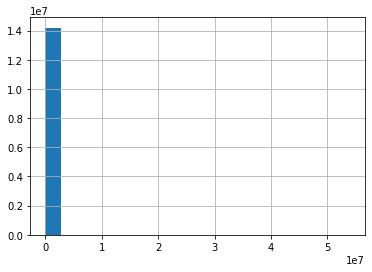

In [21]:
df['amountUSD'].hist(bins=20)

<AxesSubplot:>

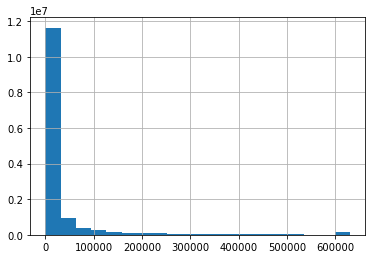

In [24]:
df.loc[df['amountUSD'] <= df['amountUSD'].quantile(0.01), 'amountUSD'] = df['amountUSD'].quantile(0.01)
df.loc[df['amountUSD'] >= df['amountUSD'].quantile(0.99), 'amountUSD'] = df['amountUSD'].quantile(0.99)
df['amountUSD'].hist(bins=20)

## 数据核验

In [8]:
df.loc[(df['logIndex'] == 485) & (df['tick'] == -30415)]

,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id
9088232,0x72e93b519e16be0327e347d5ab8211b96bbbfe4c064e076975d3e2008b610e24#32499,-9.391603,0.45,1749.955276,485,0x54bb8be0c7116eba3c0da2f8b8c4f28aad2e381a,0x54bb8be0c7116eba3c0da2f8b8c4f28aad2e381a,0xe592427a0aece92de3edee1f18e0157c05861564,17316791680232594411257128041,-30415,2021-10-17 10:57:12,ETH 2x Flexible Leverage Index,Wrapped Ether,0xaa6e8127831c9de45ae56bb1b0d4d4da6e5665bd,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x72e93b519e16be0327e347d5ab8211b96bbbfe4c064e076975d3e2008b610e24


## 识别内幕交易者

In [5]:
df.loc[df['sender'] == '0xceba60280fb0ecd9a5a26a1552b90944770a4a0e']

,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id


# 选取一种币

In [5]:
df.groupby(['token0_name'])['token0_name'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
df.groupby(['token1_name'])['token0_name'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)

,token0_name,Count
2758,Wrapped Ether,3135500
2592,USD Coin,2670540
718,Dai Stablecoin,773560
2751,Wrapped BTC,463054
2153,SHIBA INU,459195
...,...,...
2803,XLB,1
342,Bit2Me,1
2373,Sue MooGoo,1
1899,Pennies.Finance,1


,token1_name,Count
1069,Wrapped Ether,8869278
958,Tether USD,1894971
997,USD Coin,890101
594,LooksRare Token,274488
885,Smooth Love Potion,214547
...,...,...
992,UCASH,1
990,UBEC-LP,1
671,Multiverse,1
373,Ethereum Elon,1


# Spookyswap

## 读取

In [3]:
df = pd.read_csv(f'{WD}spookyswap_fantom.csv')
df.shape
df.sample(3)

(52077845, 15)

,id,amount0In,amount0Out,amount1In,amount1Out,amountUSD,logIndex,sender,timestamp,to,token0,token1,token0_id,token1_id,transaction_id
40486203,0x9420a51f964a35ce97f7aff5de106c09baa754823442d9e33c1b959fbdd43797-0,0.0,0.019782,0.000833,0.0,0.013981,43,0xf491e7b69e4244ad4002bc14e878a34207e38c29,1620856354,0x28a12f017d0d843d43c71235f4f58535b8be8563,Wrapped Fantom,SpookyToken,0x21be370d5312f44cb42ce377bc9b8a0cef1a4c83,0x841fad6eae12c286d1fd18d1d525dffa75c7effe,0x9420a51f964a35ce97f7aff5de106c09baa754823442d9e33c1b959fbdd43797
41470794,0x6ec15125bf25366eda1e28f76d780a327fa71d3d2790d75a90978c9238723faa-0,0.0,2969.626139,1.064132,0.0,4072.079968,3,0xf491e7b69e4244ad4002bc14e878a34207e38c29,1639987972,0x7003ce269f8fe382ac028f50eed4508d06f54b88,Wrapped Fantom,Ethereum,0x21be370d5312f44cb42ce377bc9b8a0cef1a4c83,0x74b23882a30290451a17c44f4f05243b6b58c76d,0x6ec15125bf25366eda1e28f76d780a327fa71d3d2790d75a90978c9238723faa
3229507,0xab588a1515723e81701068b06e92ddb827c409c900c63caeb6548a57652c4d63-0,0.0,24.494846,0.500000,0.0,1.048790,27,0xf491e7b69e4244ad4002bc14e878a34207e38c29,1638471872,0x069732af84333127be3ac463785dd9e52f3abd0b,CALYPSO,Wrapped Fantom,0x21962ae00a5435bb3dff242735eb309218a45625,0x21be370d5312f44cb42ce377bc9b8a0cef1a4c83,0xab588a1515723e81701068b06e92ddb827c409c900c63caeb6548a57652c4d63


In [7]:
df[['sender', 'to']].nunique()

sender      1804
to        466477
dtype: int64

## 识别内幕交易者

In [4]:
df.loc[df['to'] == '0x12164b332D01CC694e752d7039eE21d56fe7705D']

,id,amount0In,amount0Out,amount1In,amount1Out,amountUSD,logIndex,sender,timestamp,to,token0,token1,token0_id,token1_id,transaction_id
